In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [14]:
def gs(x,m,s):
    e = 2.71828
    s = np.sqrt(s)
    a = (1/(2.506628275*s)*e**(-(x-m)**2/(2*s)))
    return a

In [3]:
def gaussian(mean,sdev,samples):
    x = np.zeros(samples)
    y = np.zeros(samples)
    e = 2.71828
    start = mean - 6*sdev
    end = mean + 6*sdev
    div = (end - start)/samples
    for i in range(samples):
        x[i] = start + i*div
        y[i] = gs(x[i],mean,sdev)
    return y,x

In [12]:
def emalgo(itera,data,dim):
    means = np.random.uniform(-20,20,dim)
    sigmas = np.random.uniform(0,100,dim)
    np.random.shuffle(data)
    for i in range(itera):
        sumo = np.zeros(data.size)
        nr = np.zeros([data.size,dim])
        respons = np.zeros([data.size,dim])
        rep = np.zeros(dim)
        # expectation step
        for j in range(data.size):
            for k in range(dim):
                nr[j][k] = gs(data[j],means[k],sigmas[k])
                sumo[j] += nr[j][k]
        for j in range(data.size):
            for k in range(dim):
                respons[j][k] = nr[j][k]/sumo[j]
        for j in range(data.size):
            for k in range(dim):
                rep[k] += respons[j][k] 
        means = np.zeros(dim)
        sigmas = np.zeros(dim)
        # maximization step
        for k in range(dim):
            for j in range(data.size):
                means[k] += respons[j][k]*data[j]
            means[k] /= rep[k]
            for j in range(data.size):
                sigmas[k] += respons[j][k]*(data[j] - means[k])**2
            sigmas[k] /= rep[k]
            #print(means)
        np.random.shuffle(data)
    return means,sigmas

2.4247613712365252 3.196199684305844


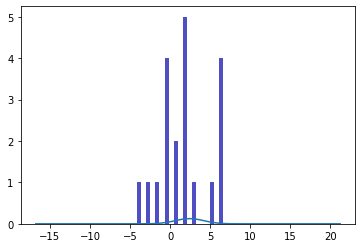

In [5]:
data1 = np.random.normal(2,3,20)
data2 = np.random.normal(-2,1,100)
data = data1
hist,bin_edges = np.histogram(data)
plt.bar(bin_edges[:-1], hist, width = 0.5, color='#0504aa',alpha=0.7)
nu = np.mean(data)
sigma = np.std(data)
print(nu,sigma)
x , y = gaussian(nu,sigma,100)
plt.plot(y,x)

Covariance matrix is [[36.56462226 -1.14110266 -0.36898102]
 [-1.14110266 35.57598293  0.17663911]
 [-0.36898102  0.17663911  1.03693538]]
Mean is [2.12094099 2.21113306 2.07257593]


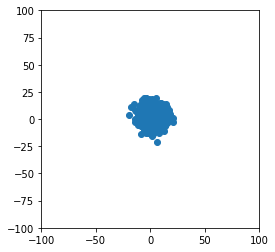

In [6]:
data1 = np.random.normal(2,6,1000)
data2 = np.random.normal(2,6,1000)
data3 = np.random.normal(2,1,1000)
data  = [data1,data2,data3]
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.gca().set_aspect('equal', adjustable='box')
data = np.array(data)
data = data.T
mean = np.mean(data, axis = 0)
cov = np.cov(data.T)
plt.scatter(data1,data2)
print('Covariance matrix is',cov)
print('Mean is',mean)

means [-5.17556943  1.84708754  6.68382797]
sigmas [3.41676772 1.39705624 4.34662473]


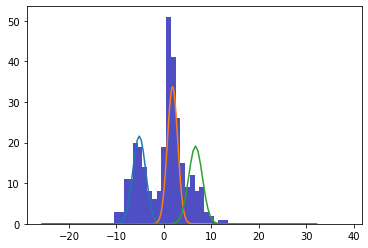

In [29]:
data1 = np.random.normal(-5,2,100)
data2 = np.random.normal(2,1,100)
data3 = np.random.normal(5,3,100)
data = np.append(data1,data2)
data = np.append(data,data3)
means,sigmas = emalgo(100,data,3)
da1,x1 = gaussian(means[0],sigmas[0],100)
da2,x2 = gaussian(means[1],sigmas[1],100)
da3,x3 = gaussian(means[2],sigmas[2],100)
print('means',means)
print('sigmas',sigmas)
hist, edges = np.histogram(data,bins=range(-20,40))
plt.bar(edges[:-1], hist, width = 1, color='#0504aa',alpha=0.7)
plt.plot(x1,100*da1)
plt.plot(x2,100*da2)
plt.plot(x3,100*da3)